In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Marketing_data.csv')

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.CASH_ADVANCE.max()

47137.211760000006

In [7]:
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


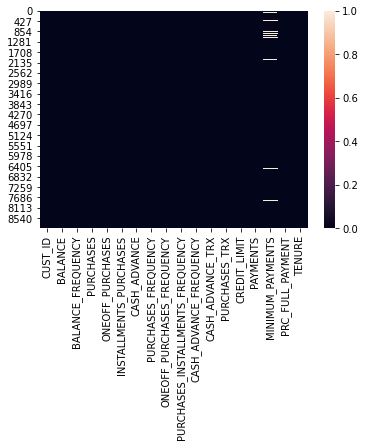

In [8]:
sns.heatmap(df.isnull());

In [9]:
#Substituindo valores nulos pela media dos valores
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [10]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

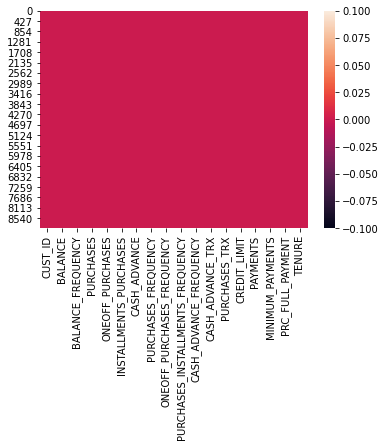

In [11]:
sns.heatmap(df.isnull());

In [12]:
df.drop('CUST_ID', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

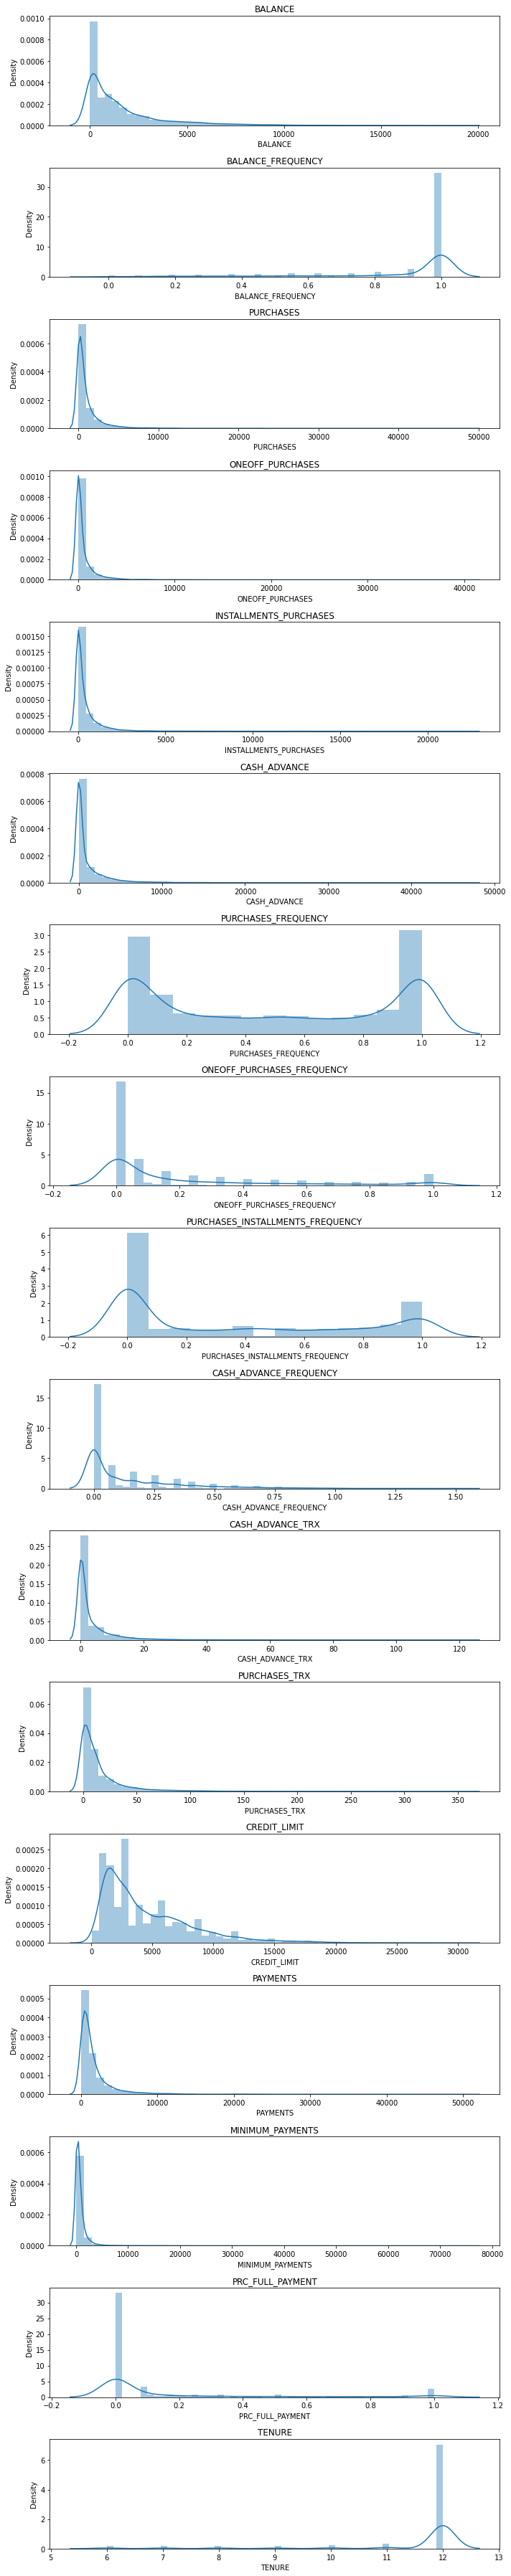

In [13]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])
plt.tight_layout();

In [14]:
correlacoes = df.corr()

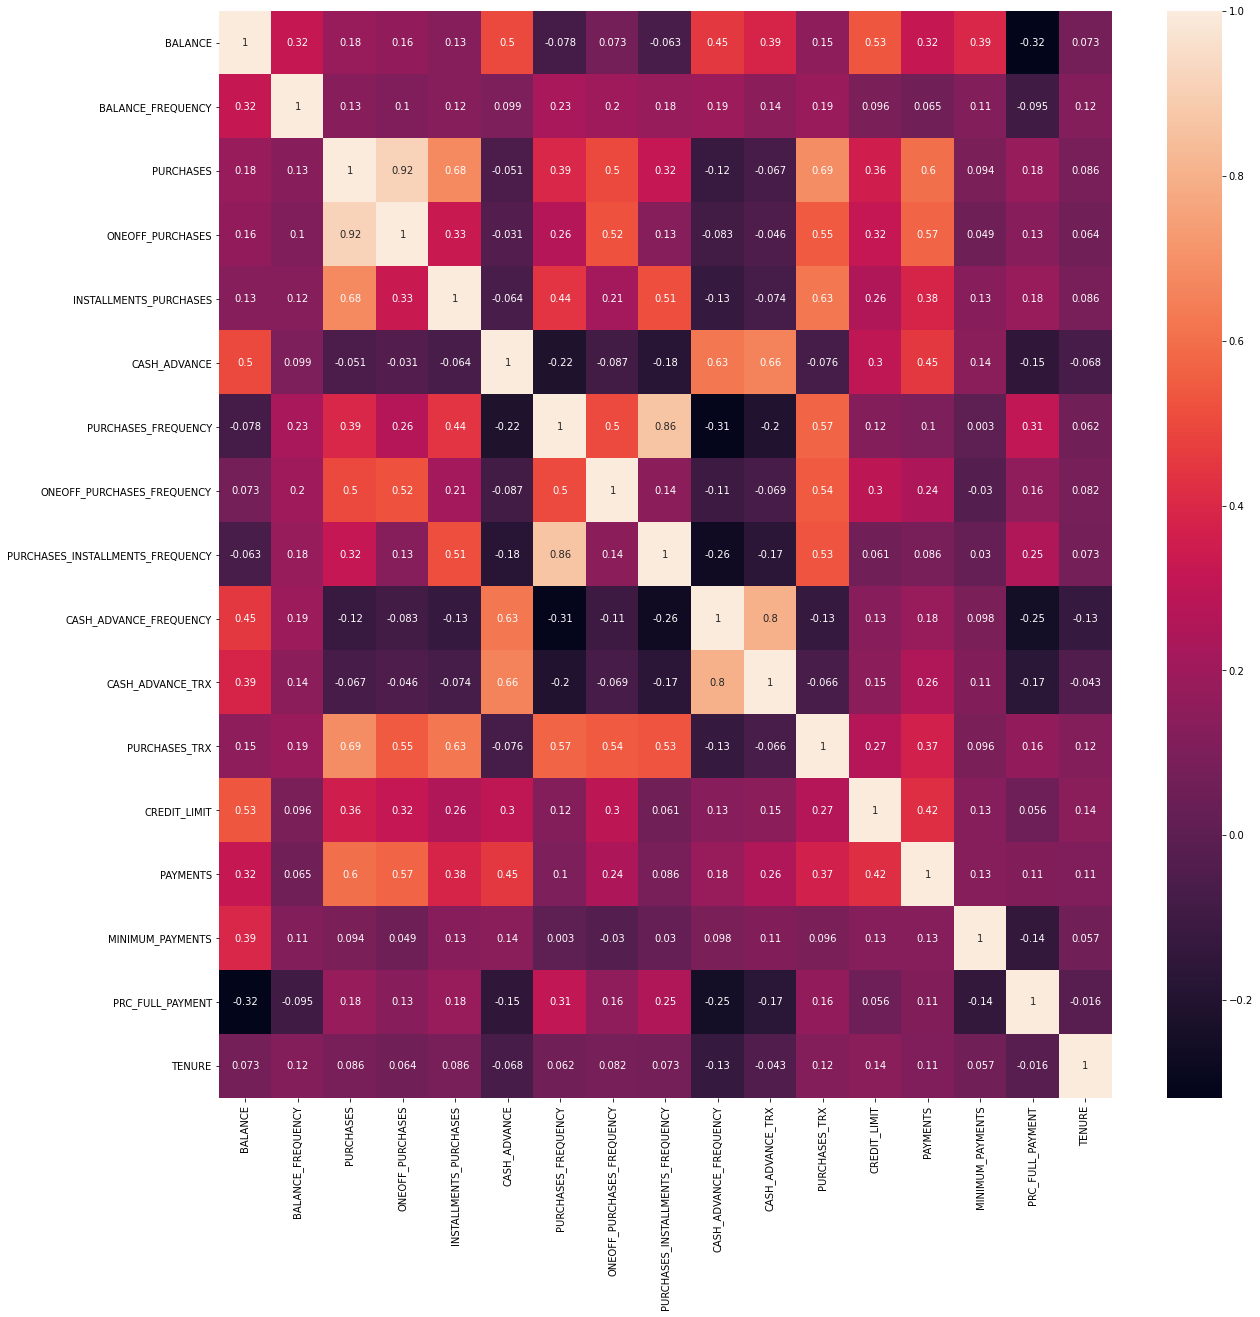

In [15]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(correlacoes, annot=True)

In [16]:
#Usar quando houver muitos outliers
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [49]:
#Usando o metodo elbow para definir a quantidade de clusters
wcss_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss_1.append(kmeans.inertia_)

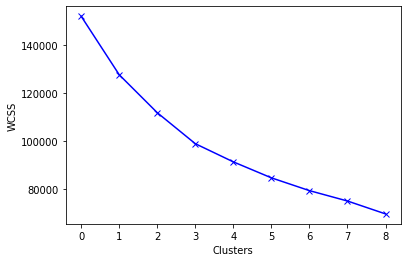

In [18]:
#Plotando o metodo elbow, para definir a quantidade ideal de clusters
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [19]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [20]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.342431,0.352395,0.027579,-0.093724,0.237229,-0.368789,0.976367,0.188396,0.898279,-0.470690,-0.359757,0.225156,-0.149355,-0.184477,-0.128100,0.330560,0.271247
1,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761
2,-0.701429,-2.137875,-0.306015,-0.230308,-0.300339,-0.323552,-0.538892,-0.437273,-0.428339,-0.522624,-0.377275,-0.414967,-0.174180,-0.199551,-0.257521,0.287773,0.201093
3,0.481744,0.455226,1.759796,1.527649,1.354401,-0.245335,1.153586,1.815657,0.947982,-0.357415,-0.267824,2.060491,1.106204,0.955570,0.080881,0.496502,0.310453
4,1.198066,0.470114,0.011315,-0.285606,0.550623,-0.026758,-0.047416,-0.547152,0.193031,-0.147366,-0.033845,0.157512,-0.062278,-0.037378,9.395504,-0.520463,0.293962
5,1.650402,0.391840,-0.213697,-0.148605,-0.232335,2.006202,-0.450539,-0.170552,-0.410137,1.929994,1.934779,-0.253899,1.013895,0.821241,0.370786,-0.389865,0.071973
6,0.013256,0.403358,-0.347237,-0.227234,-0.403453,-0.097589,-0.836688,-0.363587,-0.763928,0.096372,-0.034661,-0.473240,-0.297936,-0.246915,-0.059492,-0.455048,0.271799
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [21]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,851.732897,0.960750,1062.128577,436.874095,625.590681,205.502445,0.882214,0.258660,0.721436,0.040954,0.793752,20.306361,3951.034051,1199.099960,565.673748,0.250398,11.880316
1,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323
2,104.509936,0.370828,349.399070,210.173090,139.474556,300.367222,0.274067,0.072011,0.194204,0.030562,0.674204,4.395310,3860.711428,1155.463651,264.063700,0.237883,11.786432
3,2567.185036,0.985110,4763.035501,3128.022538,1635.836008,464.393062,0.953340,0.744103,0.741190,0.063622,1.421125,65.925926,8519.272977,4499.424792,1052.696580,0.298933,11.932785
4,4058.147688,0.988636,1027.378750,118.389464,908.989286,922.757849,0.471320,0.039232,0.441153,0.105655,3.017857,18.625000,4267.857143,1624.939144,22760.031552,0.001488,11.910714
5,4999.647301,0.970094,546.638909,345.784216,200.970227,5185.969498,0.309528,0.151579,0.201439,0.521356,16.452273,8.398864,8183.414256,4110.556491,1728.308569,0.039686,11.613636
6,1592.065725,0.972823,261.326743,215.275416,46.230242,774.221548,0.154547,0.093992,0.060833,0.154429,3.012292,2.946855,3410.436250,1018.350160,725.562306,0.020621,11.881056
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [22]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)


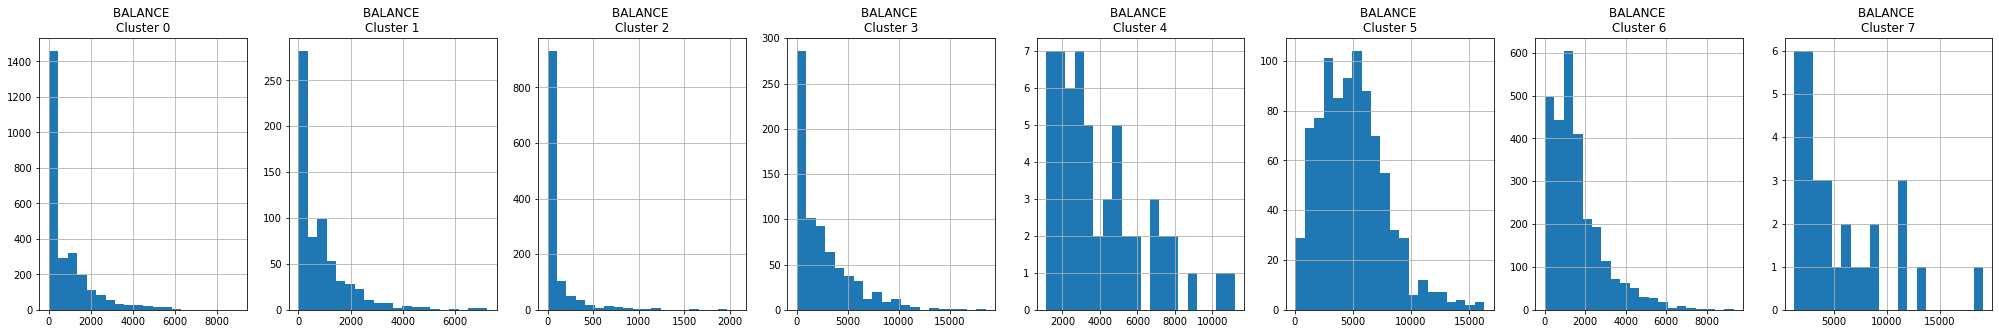

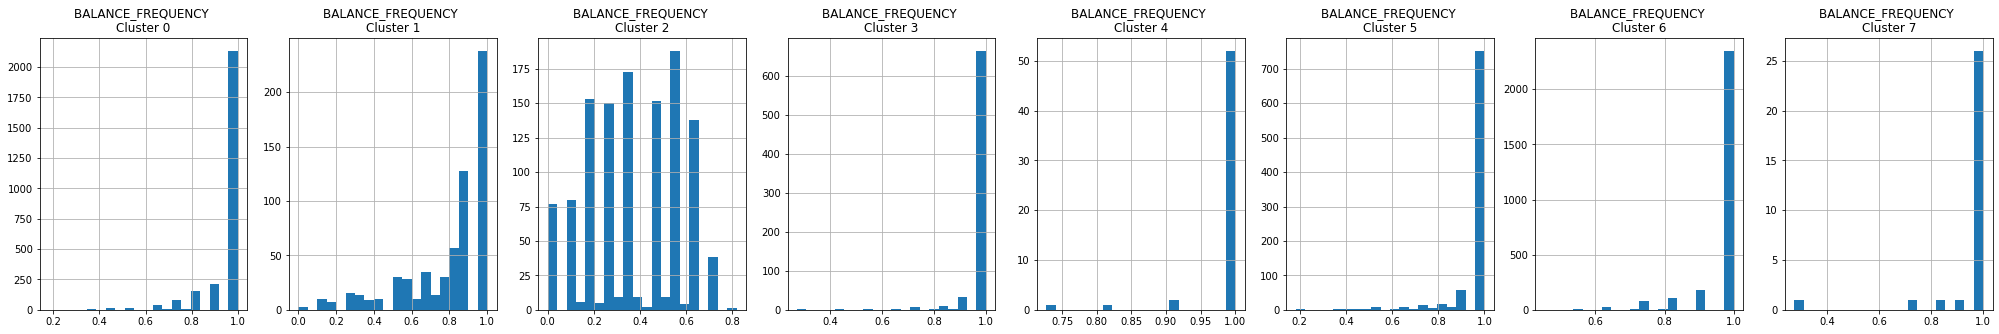

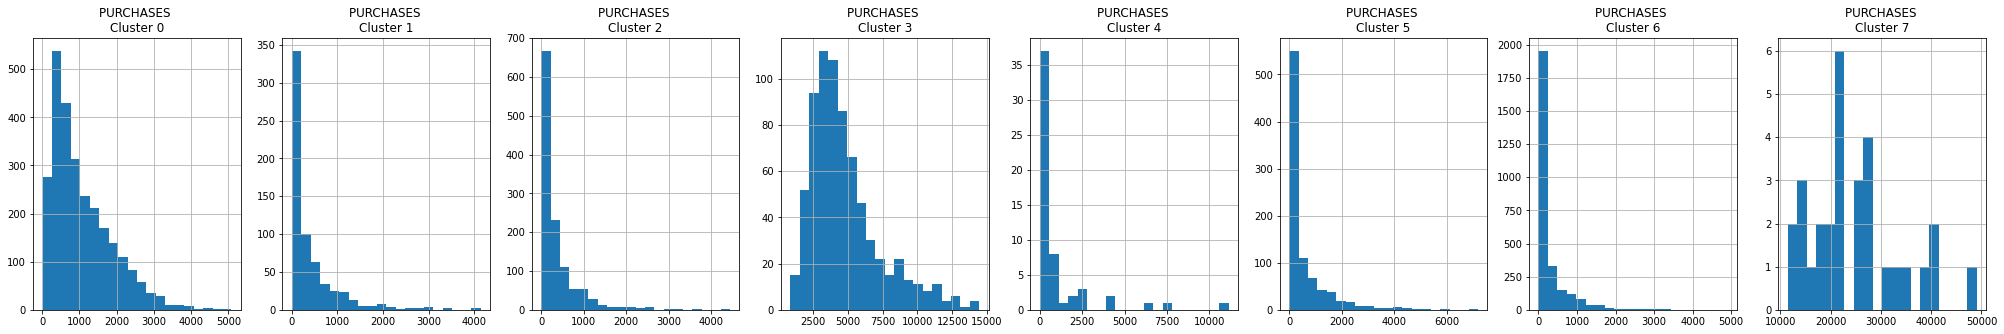

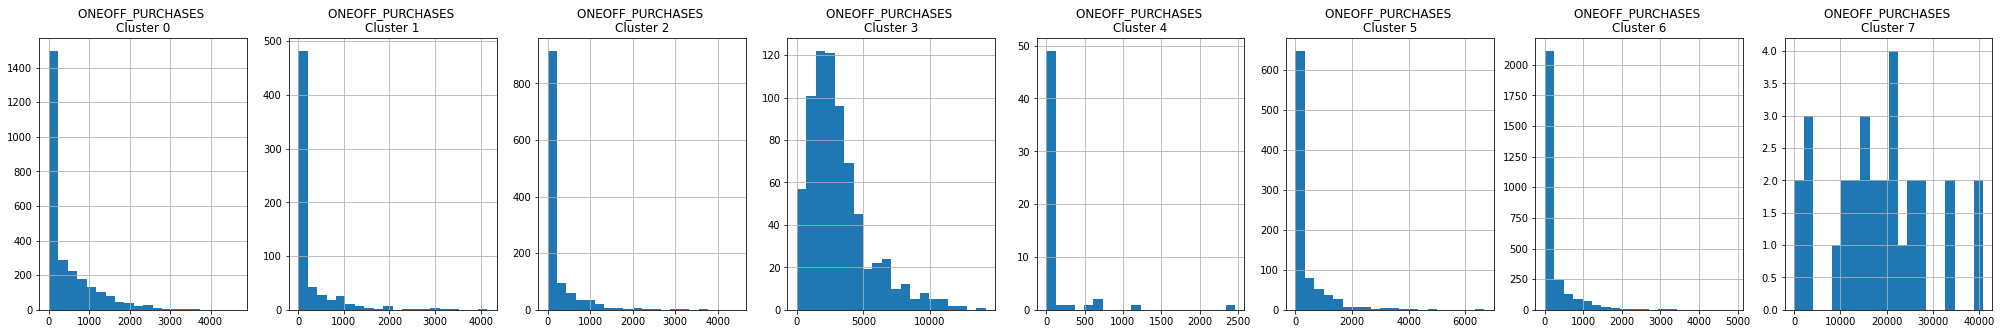

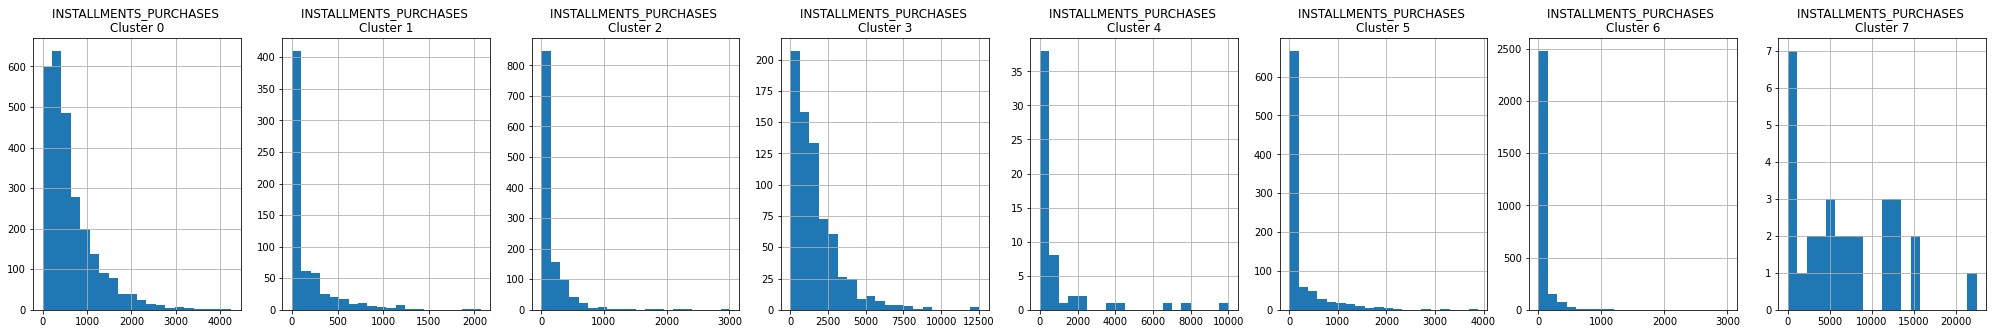

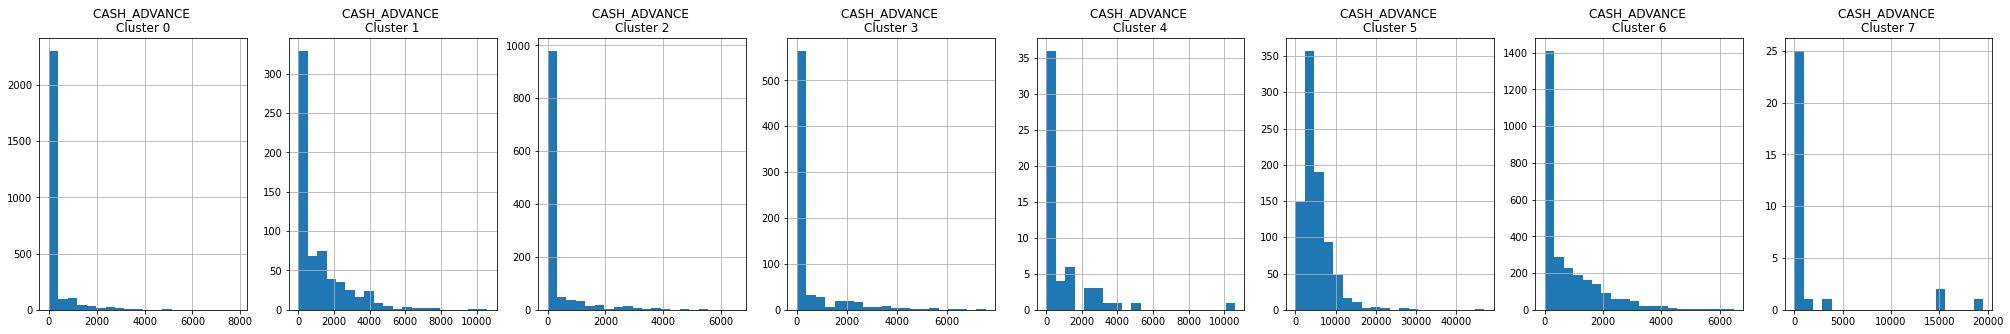

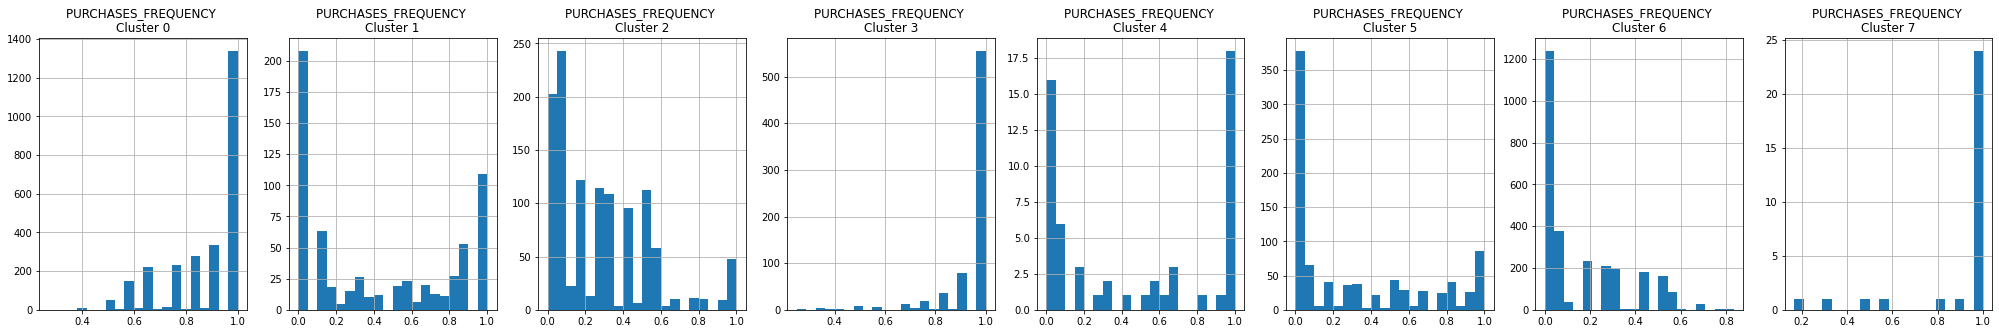

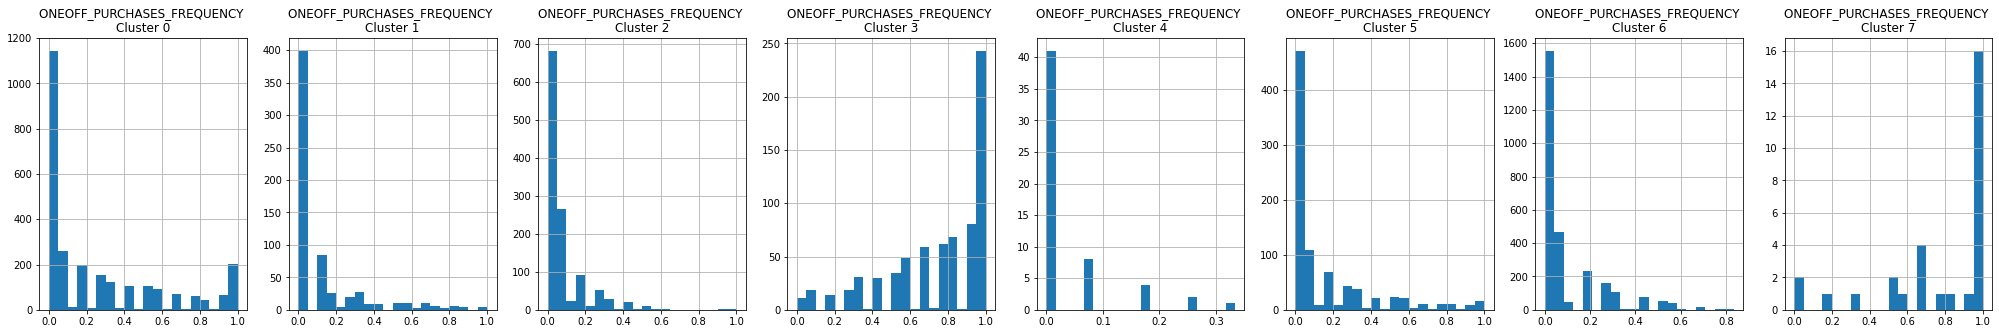

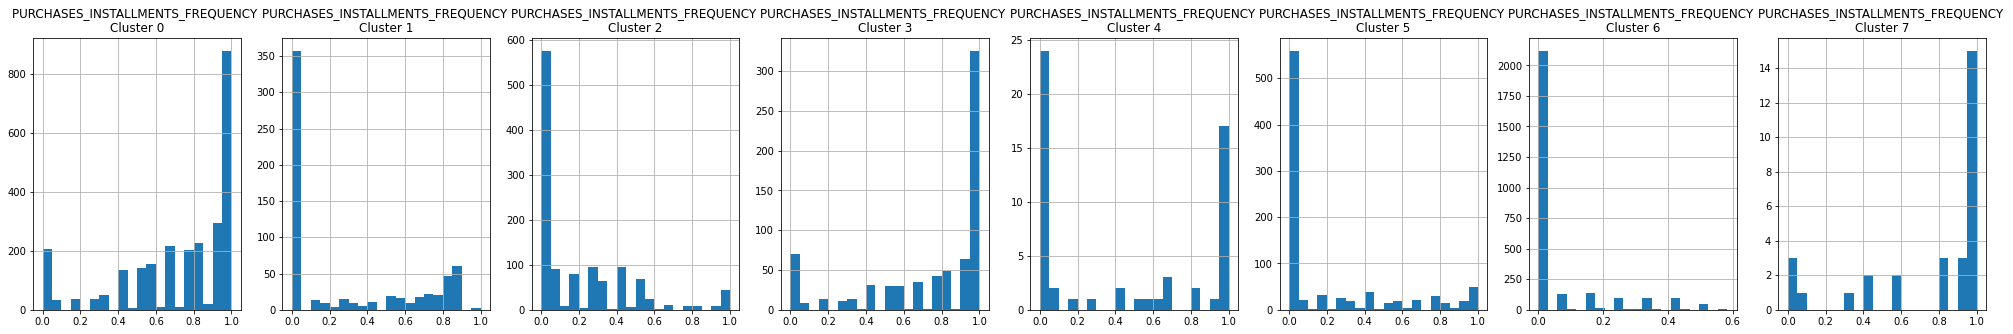

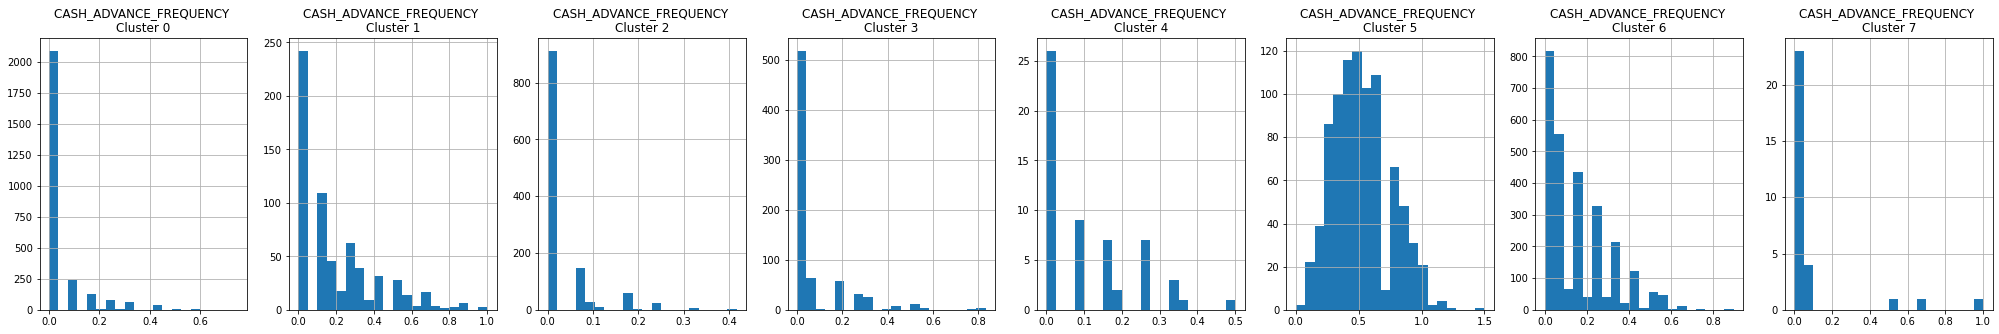

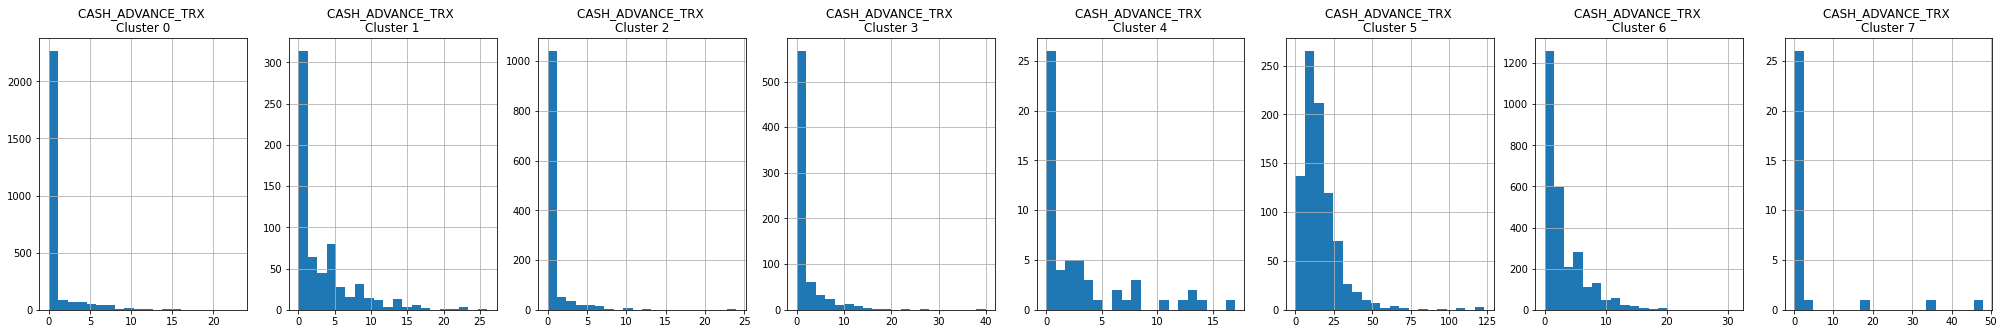

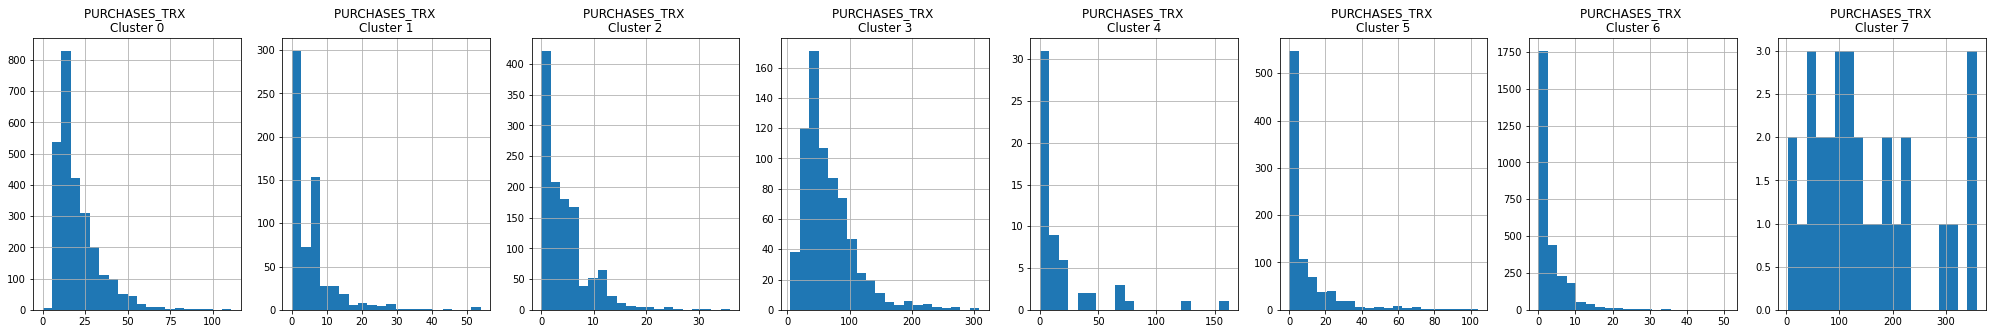

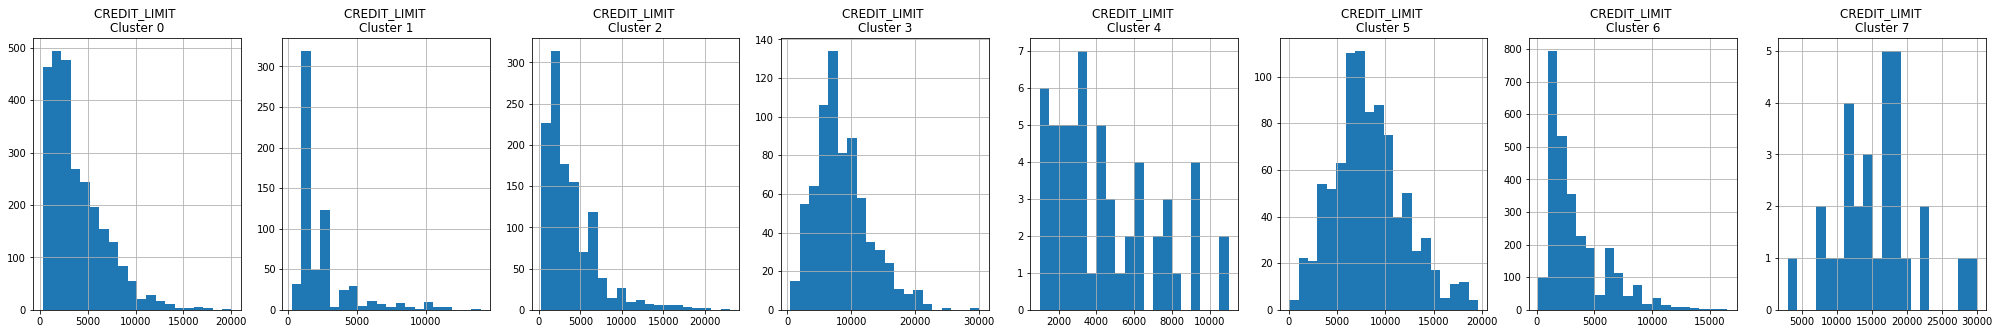

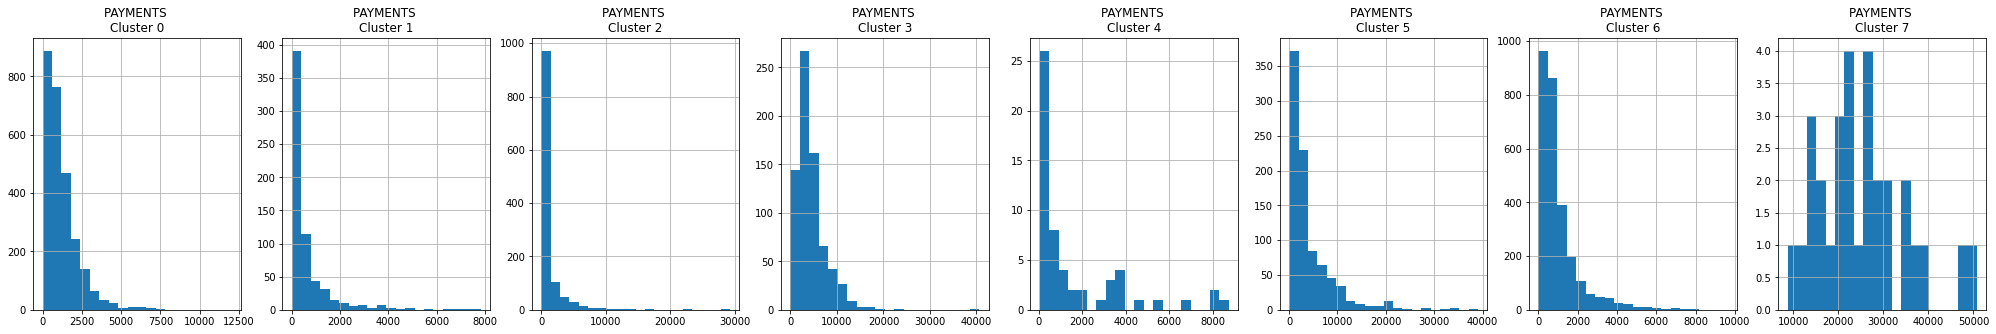

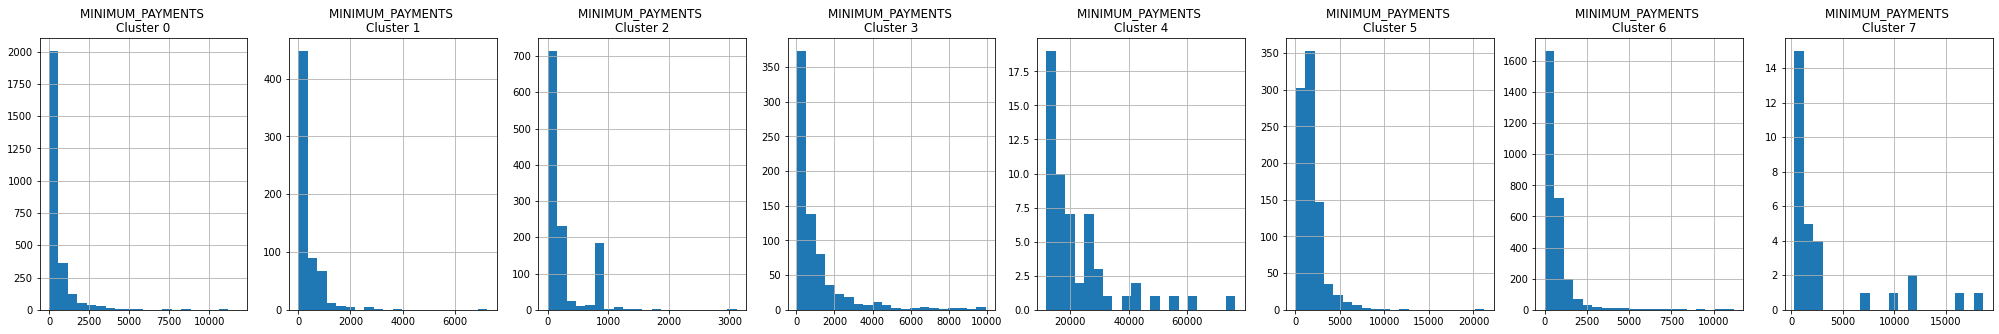

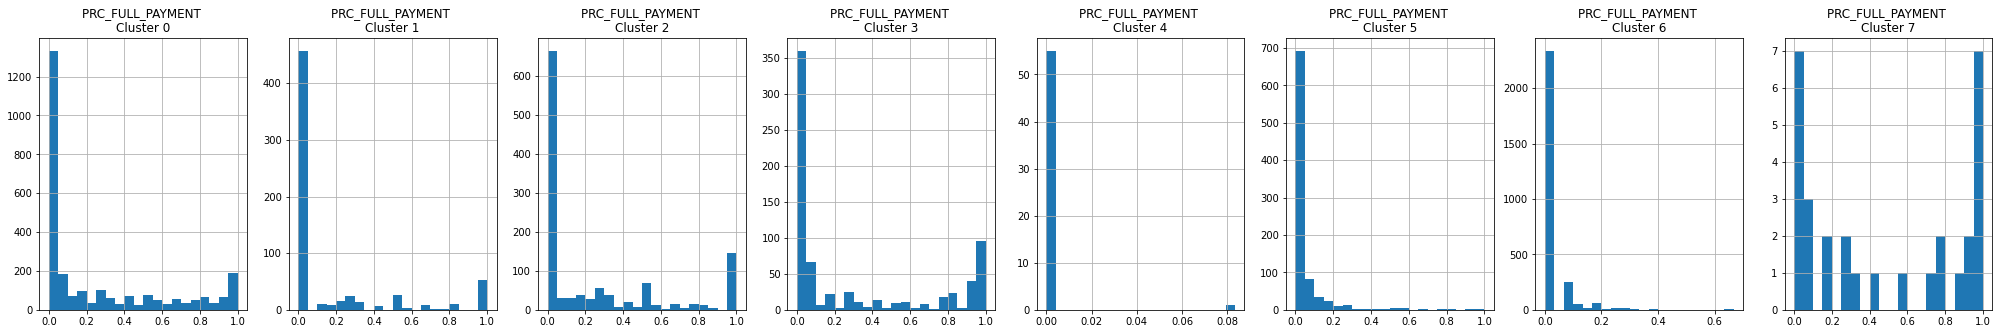

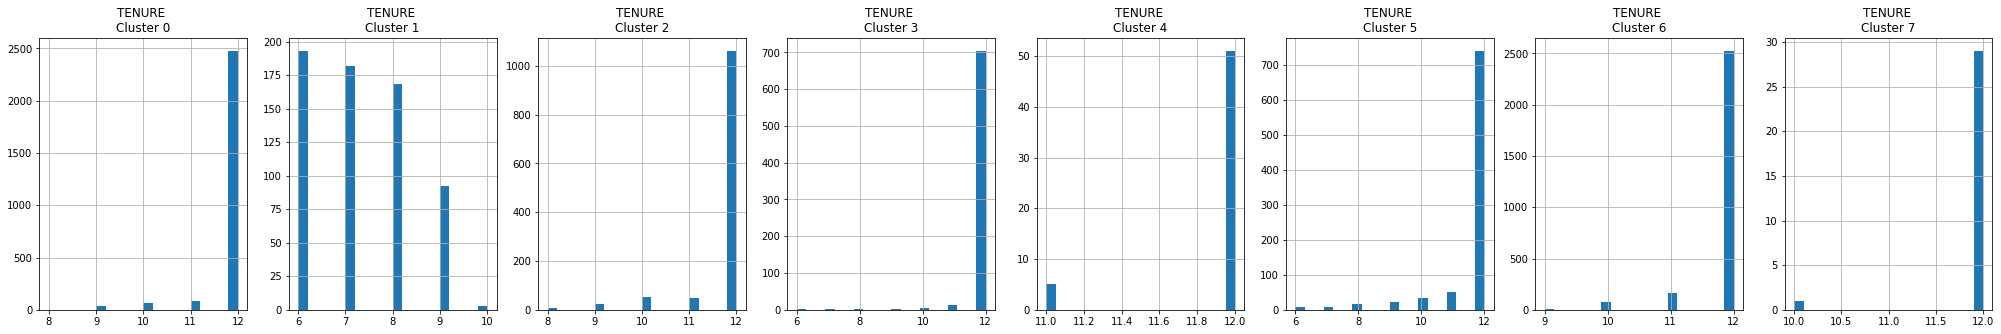

In [23]:
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [24]:
credit_ordered = df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6745,156.723260,1.000000,1776.76,0.0,1776.76,0.000000,1.000000,0.000000,0.916667,0.000000,0,22,9600.0,1339.303085,185.281009,0.916667,12,0
1927,30.863497,0.818182,143.36,0.0,143.36,736.547491,0.666667,0.000000,0.666667,0.416667,5,8,1500.0,1377.984542,123.057328,0.750000,12,0
7575,12.169653,1.000000,187.32,0.0,187.32,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2000.0,182.885361,162.175616,1.000000,12,0
1929,332.888212,1.000000,419.56,74.0,345.56,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,473.166128,193.267629,0.000000,12,0
1930,2421.943818,1.000000,612.00,76.0,536.00,2197.163192,0.916667,0.083333,0.833333,0.416667,10,14,2500.0,2483.286273,1036.057090,0.000000,12,0


In [25]:
credit_ordered.to_csv('cluster.csv')

In [26]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222075, -1.07645186],
       [-1.13829781,  2.50646765],
       [ 0.96968686, -0.38351318],
       ...,
       [-0.92620321, -1.81078372],
       [-2.33655229, -0.6579665 ],
       [-0.5564216 , -0.40046546]])

In [27]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138298,2.506468
2,0.969687,-0.383513
3,-0.873629,0.043162
4,-1.599434,-0.688580


In [28]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

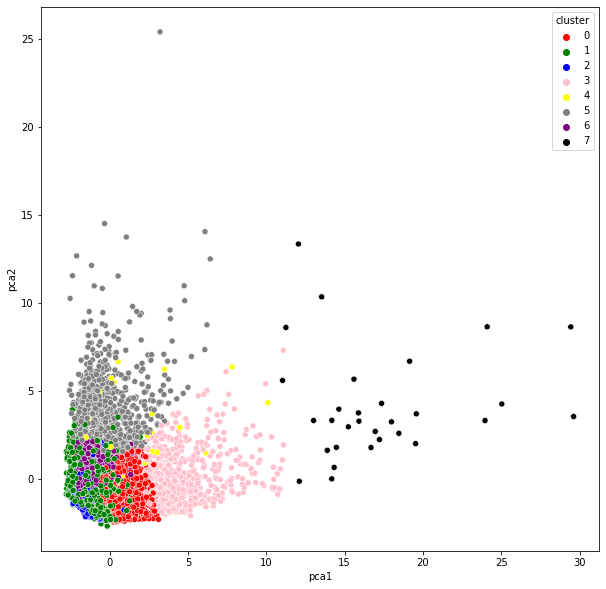

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [31]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

In [32]:
decoded = Dense(17)(x)

In [33]:
#autoencoder
autoencoder = Model(input_df, decoded)

In [34]:
#encoder
encoder = Model(input_df, encoded)

In [37]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [38]:
autoencoder.fit(df_scaled, df_scaled, epochs = 50 )

Epoch 1/50
280/280 [==============================] - 13s 43ms/step - loss: 0.1735
Epoch 2/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0757
Epoch 3/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0528
Epoch 4/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0487
Epoch 5/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0349
Epoch 6/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0241
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0361
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0404
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0217
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0196
Epoch 11/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0197
Epoch 12/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0248
Epoch 13/50

In [39]:
compact = encoder.predict(df_scaled)

In [46]:
wcss_2 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

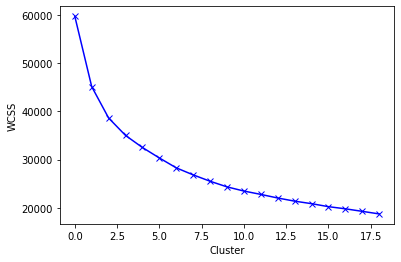

In [47]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS');

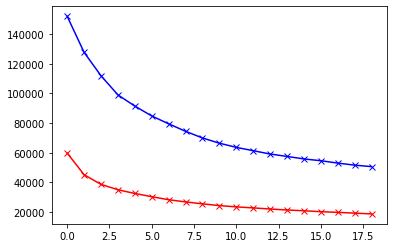

In [50]:
#Comparando os elbows
plt.plot(wcss_1, 'bx-', color='b')
plt.plot(wcss_2, 'bx-', color='r')

In [51]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
labels = kmeans.labels_
labels, labels.shape


(array([2, 1, 2, ..., 0, 0, 0], dtype=int32), (8950,))

In [55]:
#Concatenando a base de dados original, ao data ao dataframe compactado
df_cluster_at = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)

In [59]:
pca = PCA(n_components=2)
print_comp = pca.fit_transform(compact)
pca_df =  pd.DataFrame(data = print_comp, columns=['pca1', 'pca2'])



In [61]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

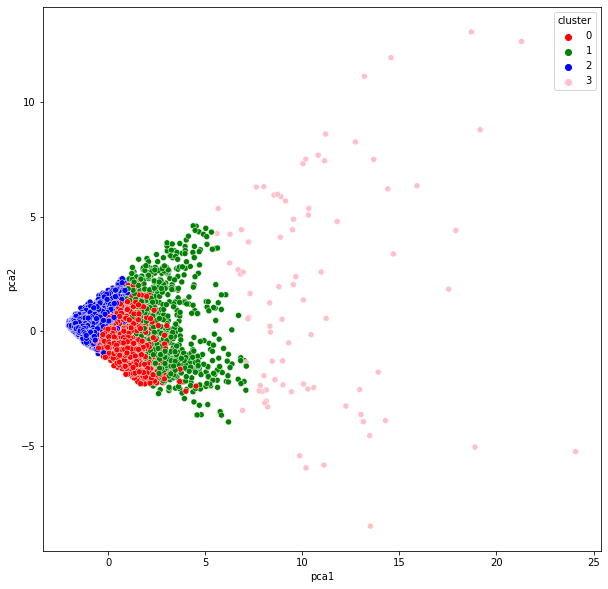

In [63]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [64]:
#Gerando um novo dataframe, ordenado do menor para o mair, baseado na coluna Cluster
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')

In [66]:
#Gerando um CSV, para encaminhar a equipe de negocios, para desenvoler 
df_cluster_ordered.to_excel('cluster_ordered.xls')